In [1]:
from seminartools.data import read_merged
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
countries = [
    "Japan", "Canada", "United States", "Australia", "New Zealand", "Switzerland", 
    "Italy", "France", "Portugal", "Spain", "Sweden", "Denmark", "United Kingdom", 
    "Germany", "Netherlands", "Norway", "Belgium", "Korea", "South Africa", "Türkiye"
]
df = read_merged(only_countries=countries).reset_index()

/Users/philipphocker/Documents/GitHub/seminar/seminartools/data.py:173: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
/Users/philipphocker/Documents/GitHub/seminar/seminartools/data.py:409: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


In [3]:
#find the median inflation at each quarter
df["median_inflation"] = df.groupby("date")["inflation"].transform("median")

In [4]:
df

,index,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET,median_inflation
0,0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740,0.022951
1,1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740,0.022951
2,2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740,0.022951
3,3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029,0.023346
4,4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029,0.023346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183,0.008485
2167,2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183,0.008485
2168,2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183,0.008485
2169,2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183,0.008485


# Inflation and commodities

In [5]:
# extract one country (Australia)
single_country_df = df[df["country"] == "Australia"]

In [6]:
# for the columns, 'commodity_CRUDE_PETRO', 'commodity_iNATGAS', 'commodity_iAGRICULTURE', 'commodity_iMETMIN', 'commodity_iPRECIOUSMET'
# assume the initial index value is 100, and calculate the index value for each quarter, based on the growth rates.
# for example, if the growth rate is 0.1, the index value for the next quarter will be 110.
# if the growth rate is -0.1, the index value for the next quarter will be 90.

# calculate the growth rate for each commodity
for commodity in ['commodity_CRUDE_PETRO', 'commodity_iNATGAS', 'commodity_iAGRICULTURE', 'commodity_iMETMIN', 'commodity_iPRECIOUSMET']:
    single_country_df[f"{commodity}_index"] = 100 * (1 + single_country_df[commodity]).cumprod()

/var/folders/3m/47824pgj6rl3wf7k8lbrkm_m0000gn/T/ipykernel_44763/31821385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_country_df[f"{commodity}_index"] = 100 * (1 + single_country_df[commodity]).cumprod()
/var/folders/3m/47824pgj6rl3wf7k8lbrkm_m0000gn/T/ipykernel_44763/31821385.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_country_df[f"{commodity}_index"] = 100 * (1 + single_country_df[commodity]).cumprod()
/var/folders/3m/47824pgj6rl3wf7k8lbrkm_m0000gn/T/ipykernel_44763/31821385.

In [7]:
# import matplotlib.pyplot as plt

# # Assuming single_country_df is your dataframe and it's already loaded in your environment

# plt.figure(figsize=(20, 10))

# # First axis for inflation
# ax1 = plt.gca()
# ax1.plot(single_country_df['date'], single_country_df['median_inflation'], label='Inflation', color='tab:blue', marker='o')
# ax1.set_xlabel('Date')
# ax1.set_ylabel('Inflation', color='tab:blue')
# ax1.tick_params(axis='y', labelcolor='tab:blue')
# ax1.legend(loc='upper left')
# ax1.grid(True)

# # Second axis for commodities with logarithmic scale
# ax2 = ax1.twinx()
# ax2.set_yscale('log')
# ax2.plot(single_country_df['date'], single_country_df['commodity_CRUDE_PETRO_index'], label='Crude Petro', color='tab:red', marker='o')
# ax2.plot(single_country_df['date'], single_country_df['commodity_iNATGAS_index'], label='Natural Gas', color='tab:green', marker='o')
# ax2.plot(single_country_df['date'], single_country_df['commodity_iAGRICULTURE_index'], label='Agriculture', color='tab:purple', marker='o')
# ax2.plot(single_country_df['date'], single_country_df['commodity_iMETMIN_index'], label='Metal & Mining', color='tab:brown', marker='o')
# ax2.plot(single_country_df['date'], single_country_df['commodity_iPRECIOUSMET_index'], label='Precious Metals', color='tab:pink', marker='o')
# ax2.set_ylabel('Commodity Indices (Log Scale)', color='tab:red')
# ax2.tick_params(axis='y', labelcolor='tab:red')
# ax2.legend(loc='upper right')

# # Adding title
# plt.title('Inflation and Commodity Prices Over Time')

# # Show the plot
# plt.show()


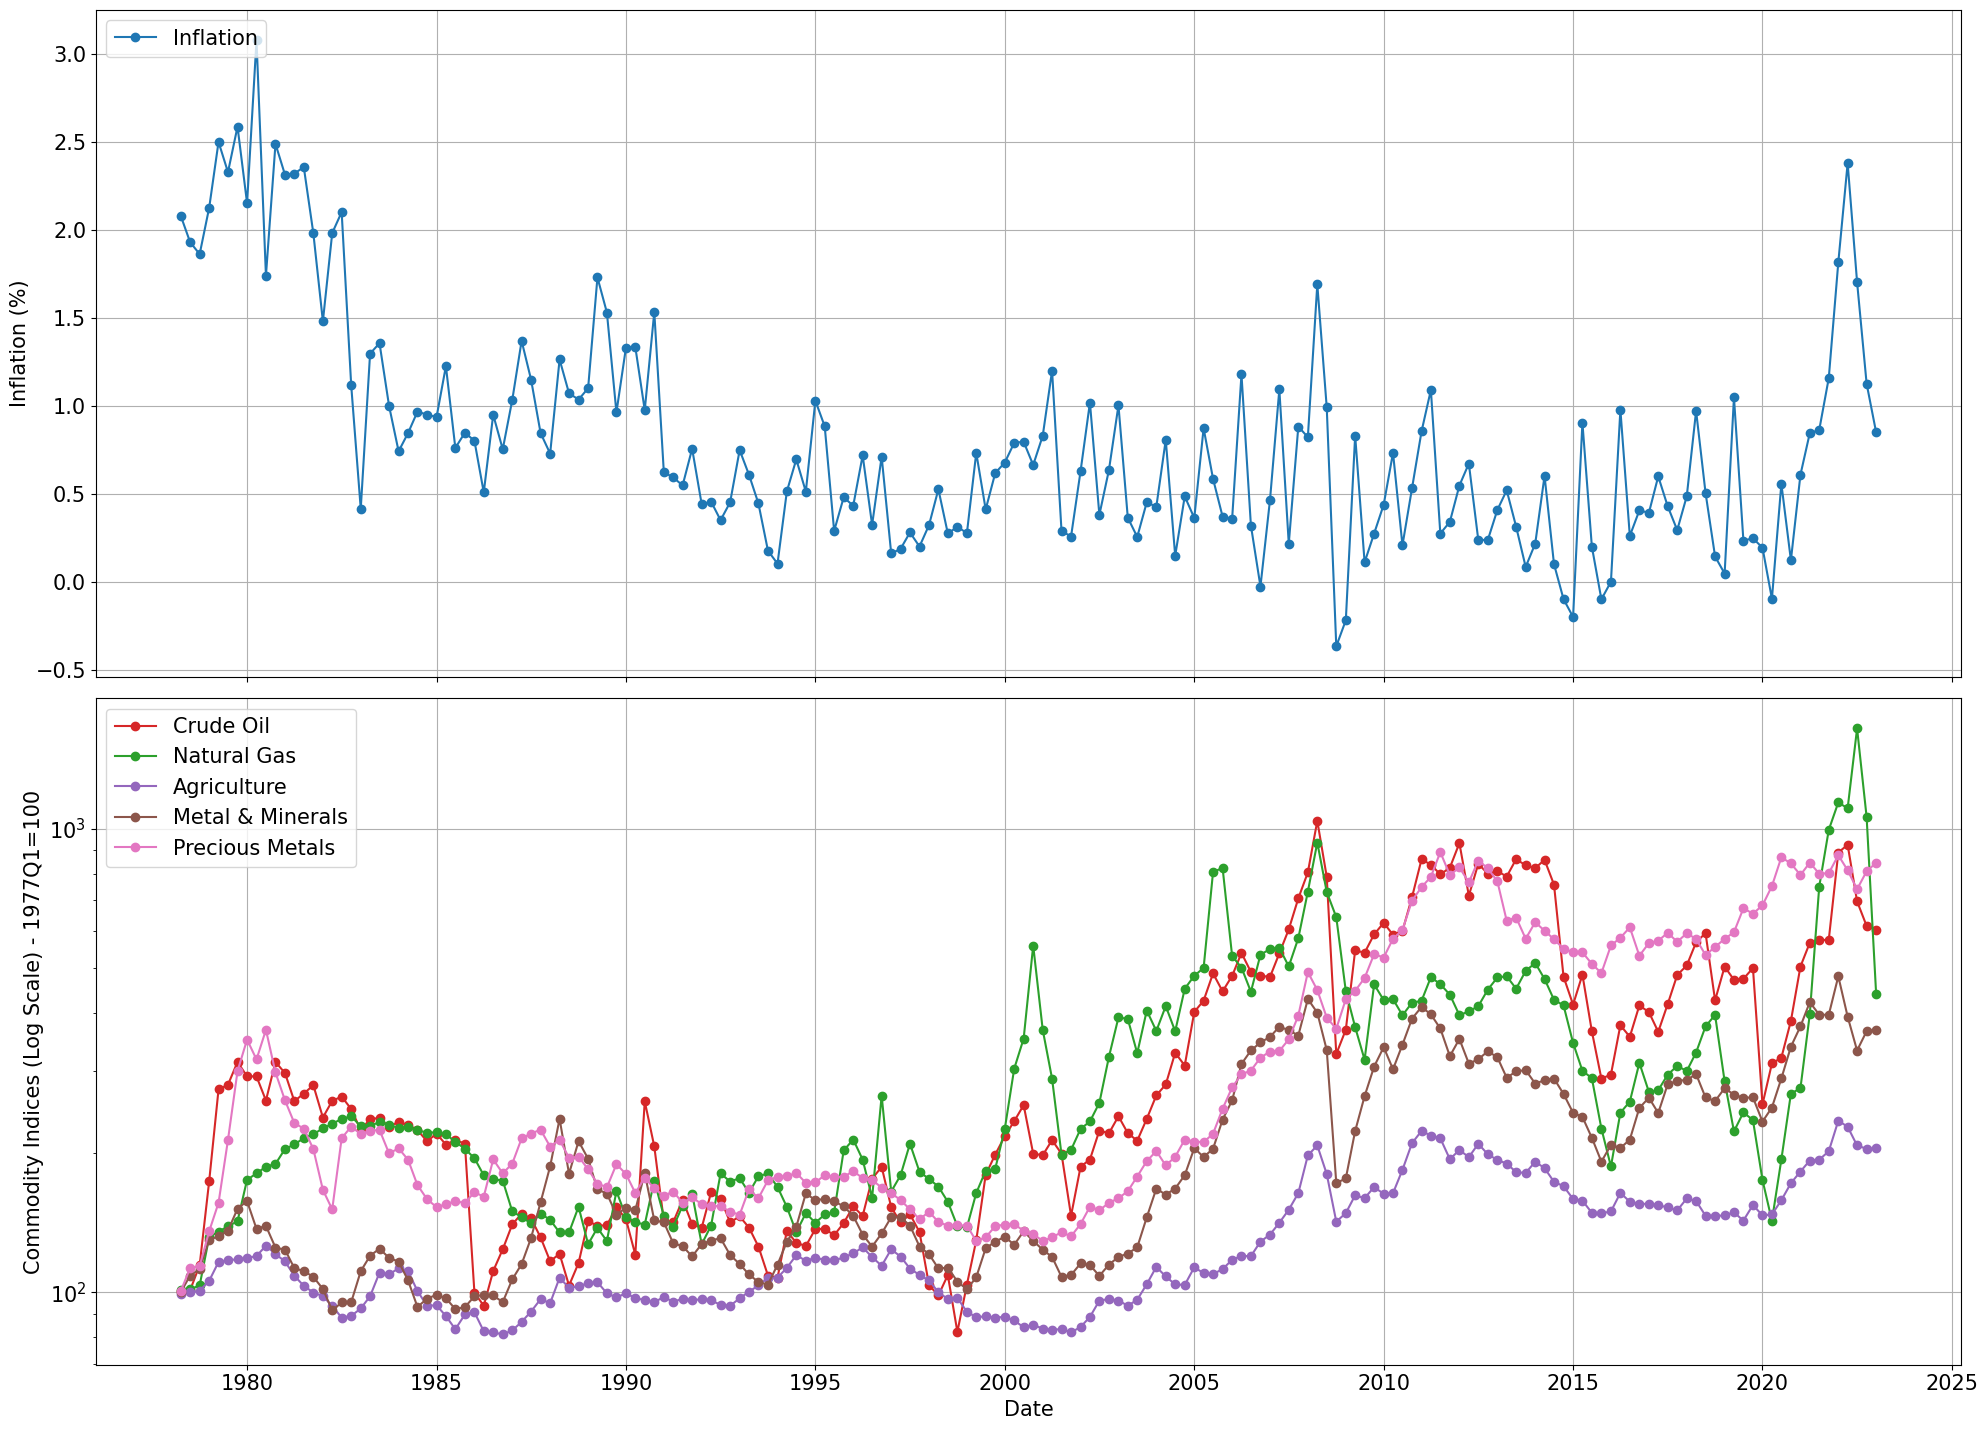

In [8]:
import matplotlib.pyplot as plt

# Assuming single_country_df is your dataframe and it's already loaded in your environment

# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 15), sharex=True)

# First subplot for inflation
ax1.plot(single_country_df['date'], single_country_df['median_inflation']*100, label='Inflation', color='tab:blue', marker='o')
ax1.set_ylabel('Inflation (%)', fontsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.legend(loc='upper left', fontsize=15)
ax1.grid(True)

# Second subplot for commodities with logarithmic scale
ax2.set_yscale('log')
ax2.plot(single_country_df['date'], single_country_df['commodity_CRUDE_PETRO_index'], label='Crude Oil', color='tab:red', marker='o')
ax2.plot(single_country_df['date'], single_country_df['commodity_iNATGAS_index'], label='Natural Gas', color='tab:green', marker='o')
ax2.plot(single_country_df['date'], single_country_df['commodity_iAGRICULTURE_index'], label='Agriculture', color='tab:purple', marker='o')
ax2.plot(single_country_df['date'], single_country_df['commodity_iMETMIN_index'], label='Metal & Minerals', color='tab:brown', marker='o')
ax2.plot(single_country_df['date'], single_country_df['commodity_iPRECIOUSMET_index'], label='Precious Metals', color='tab:pink', marker='o')
ax2.set_xlabel('Date', fontsize=15)
ax2.tick_params(axis='x', labelsize=15)
ax2.set_ylabel('Commodity Indices (Log Scale) - 1977Q1=100', fontsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax2.legend(loc='upper left', fontsize=15)
ax2.grid(True)

# Adding title
#fig.suptitle('Inflation and Commodity Prices Over Time', fontsize=16)

# Automatically adjust the subplot params so that the subplot(s) fits in to the figure area.
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


# Inflation and interest

In [9]:
single_country_df = df[df["country"] == "Netherlands"]

In [10]:
# compute 4 quarter moving average of inflation
single_country_df["inflation_4q_ma"] = single_country_df["inflation"].rolling(4).mean()

/var/folders/3m/47824pgj6rl3wf7k8lbrkm_m0000gn/T/ipykernel_44763/1716811759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_country_df["inflation_4q_ma"] = single_country_df["inflation"].rolling(4).mean()


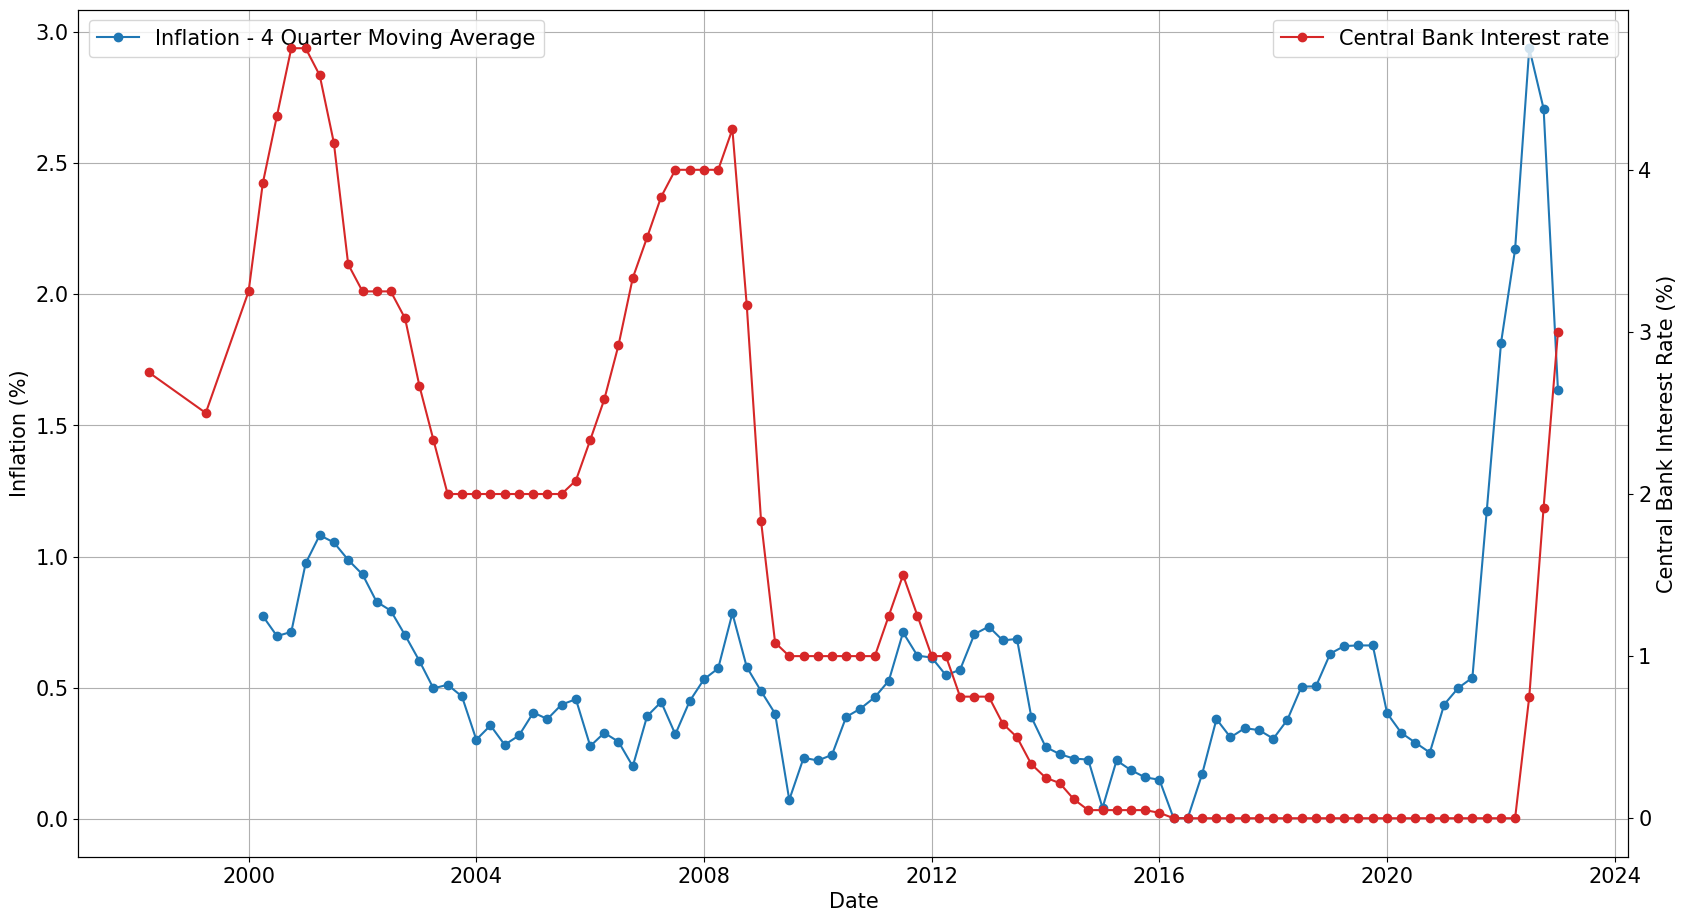

In [11]:
import matplotlib.pyplot as plt

# Assuming single_country_df is your dataframe and it's already loaded in your environment

plt.figure(figsize=(20, 11))

# First axis for inflation
ax1 = plt.gca()
ax1.plot(single_country_df['date'], single_country_df['inflation_4q_ma']*100, label='Inflation - 4 Quarter Moving Average', color='tab:blue', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation (%)', fontsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.legend(loc='upper left', fontsize=15)
ax1.grid(True)

# Second axis for commodities with logarithmic scale
ax2 = ax1.twinx()
#ax2.set_yscale('log')
ax2.plot(single_country_df['date'], single_country_df['interest_rate'], label='Central Bank Interest rate', color='tab:red', marker='o')
ax2.set_ylabel('Central Bank Interest Rate (%)', fontsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax2.legend(loc='upper right', fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.tick_params(axis='x', labelsize=15)

# Show the plot
plt.show()


# Inflation seasonality

In [12]:
import statsmodels.api as sm

In [13]:
single_country_df = df[df["country"] == "Netherlands"]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


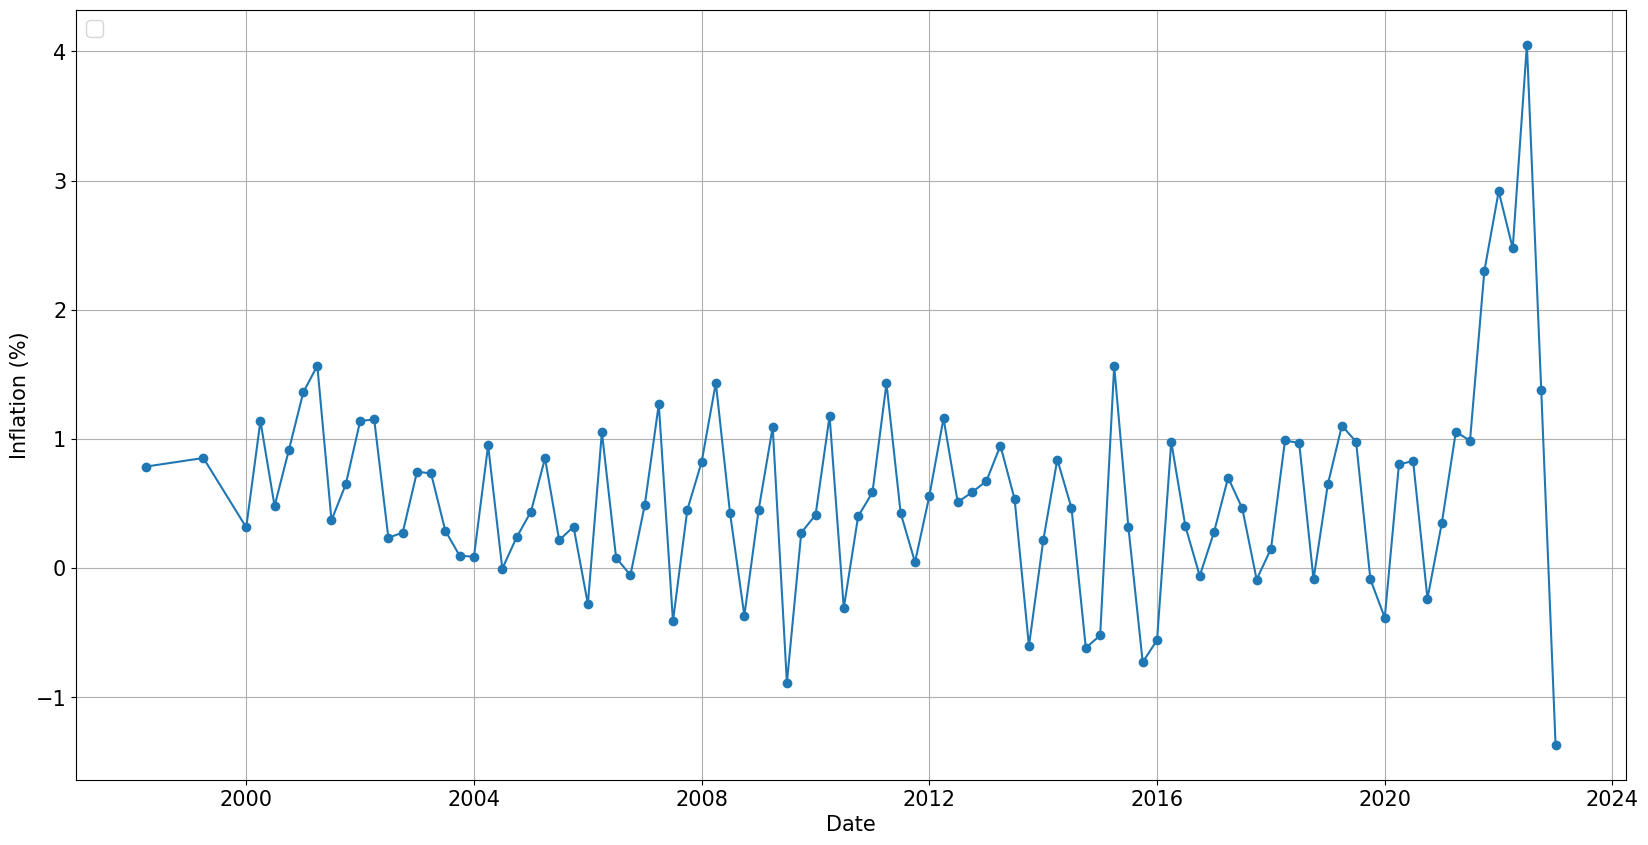

In [14]:
import matplotlib.pyplot as plt

# Assuming single_country_df is your dataframe and it's already loaded in your environment

plt.figure(figsize=(20, 10))

# First axis for inflation
ax1 = plt.gca()
ax1.plot(single_country_df['date'], single_country_df['inflation']*100, color='tab:blue', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation (%)', fontsize=15)
ax1.tick_params(axis='y', labelsize=15)
ax1.legend(loc='upper left', fontsize=15)
ax1.grid(True)

# # Second axis for commodities with logarithmic scale
# ax2 = ax1.twinx()
# #ax2.set_yscale('log')
# ax2.plot(single_country_df['date'], single_country_df['interest_rate'], label='Central Bank Interest rate', color='tab:red', marker='o')
# ax2.set_ylabel('Central Bank Interest Rate (%)', fontsize=15)
# ax2.tick_params(axis='y', labelsize=15)
# ax2.legend(loc='upper right', fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.tick_params(axis='x', labelsize=15)

# Show the plot
plt.show()


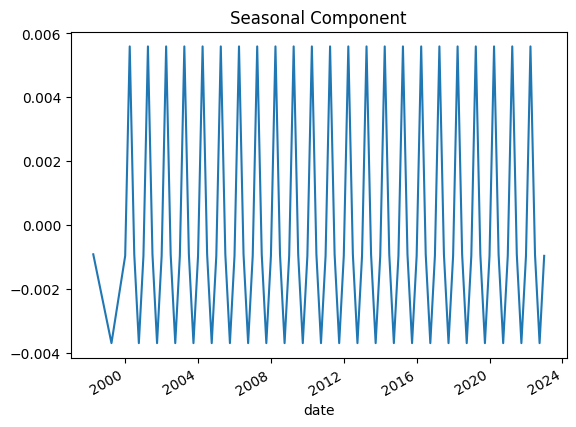

In [15]:
# Directly convert the date column to a DatetimeIndex and set it as the index
single_country_df.set_index(pd.to_datetime(single_country_df['date']), inplace=True)

# Set the frequency of the index to quarterly if not already set
if single_country_df.index.freq is None:
    single_country_df.asfreq('QE')

data = single_country_df["inflation"]

# Decompose the time series
decomposition = sm.tsa.seasonal_decompose(data, model='additive', period=4)  # Explicitly specifying the period for quarterly data

# Plot the seasonal component
decomposition.seasonal.plot()
plt.title('Seasonal Component')
plt.show()

# Calculate yearly seasonality strength

# Check for a trend in seasonal strength
# seasonal_strength.plot()
# plt.title('Seasonal Strength Over Time')
# plt.show()


In [16]:
decomposition.seasonal

date
1998-04-01   -0.000920
1999-04-01   -0.003702
2000-01-01   -0.000968
2000-04-01    0.005590
2000-07-01   -0.000920
                ...   
2022-01-01   -0.000968
2022-04-01    0.005590
2022-07-01   -0.000920
2022-10-01   -0.003702
2023-01-01   -0.000968
Name: seasonal, Length: 95, dtype: float64

In [17]:
single_country_df

,index,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET,median_inflation
date,,,,,,,,,,,,,
1998-04-01,396,Netherlands,1998-04-01,0.007868,0.715690,2.750000,4.4,-0.049098,-0.037057,-0.056925,-0.068441,-0.048643,0.005258
1999-04-01,432,Netherlands,1999-04-01,0.008528,1.112902,2.500000,3.6,0.245063,0.185604,-0.026673,0.062249,-0.073526,0.007331
2000-01-01,473,Netherlands,2000-01-01,0.003160,0.622710,3.250000,3.3,0.095219,0.218652,0.002835,0.024545,0.008684,0.006775
2000-04-01,482,Netherlands,2000-04-01,0.011385,1.116803,3.916667,2.7,0.077511,0.349167,-0.017252,-0.038788,0.002451,0.007896
2000-07-01,495,Netherlands,2000-07-01,0.004806,0.825163,4.333333,2.9,0.083120,0.160782,-0.033422,0.068791,-0.033379,0.007958
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,2082,Netherlands,2022-01-01,0.029173,0.476795,0.000000,3.6,0.542498,0.146272,0.163679,0.210497,0.093645,0.018159
2022-04-01,2100,Netherlands,2022-04-01,0.024764,1.707911,0.000000,3.3,0.039177,-0.028903,-0.029440,-0.181045,-0.072004,0.023795
2022-07-01,2134,Netherlands,2022-07-01,0.040519,0.170187,0.750000,3.7,-0.244692,0.486523,-0.088860,-0.154988,-0.090042,0.017034


In [18]:
# Procedure that works for all countries
seasonality_results_df = []
for country in countries:
    single_country_df = df[df["country"] == country]
    single_country_df.set_index(pd.to_datetime(single_country_df['date']), inplace=True)
    if single_country_df.index.freq is None:
        single_country_df.asfreq('QE')
    first_period_data = single_country_df["inflation"].loc['1977Q1':'1991Q4']
    second_period_data = single_country_df["inflation"].loc['1992Q1':'2006Q4']
    third_period_data = single_country_df["inflation"].loc['2007Q1':'2023Q1']
    try:
        decomposition_first_period = sm.tsa.seasonal_decompose(first_period_data, model='additive', period=4)
        seasonal_strength_first_period = decomposition_first_period.seasonal.max() - decomposition_first_period.seasonal.min()
    except:
        seasonal_strength_first_period = np.nan

    try:    
        decomposition_second_period = sm.tsa.seasonal_decompose(second_period_data, model='additive', period=4)
        seasonal_strength_second_period = decomposition_second_period.seasonal.max() - decomposition_second_period.seasonal.min()
    except:
        seasonal_strength_second_period = np.nan

    try:    
        decomposition_third_period = sm.tsa.seasonal_decompose(third_period_data, model='additive', period=4)
        seasonal_strength_third_period = decomposition_third_period.seasonal.max() - decomposition_third_period.seasonal.min()
    except:
        seasonal_strength_third_period = np.nan
    
    seasonality_results_df.append({'country': country, 'seasonal_strength_1977Q1_1991Q4': seasonal_strength_first_period, 'seasonal_strength_1992Q1_2006Q4': seasonal_strength_second_period, 'seasonal_strength_2007Q1_2023Q1': seasonal_strength_third_period})

seasonality_results_df = pd.DataFrame(seasonality_results_df)
    

In [19]:
seasonality_results_df.sort_values(by='seasonal_strength_1992Q1_2006Q4', ascending=True, inplace=True)

In [20]:
# rename the columns
seasonality_results_df.columns = ['Country', '1977Q1-1991Q4', '1992Q1-2006Q4', '2007Q1-2023Q1']
seasonality_results_df['1977Q1-1991Q4'] = seasonality_results_df['1977Q1-1991Q4']*100
seasonality_results_df['1992Q1-2006Q4'] = seasonality_results_df['1992Q1-2006Q4']*100
seasonality_results_df['2007Q1-2023Q1'] = seasonality_results_df['2007Q1-2023Q1']*100

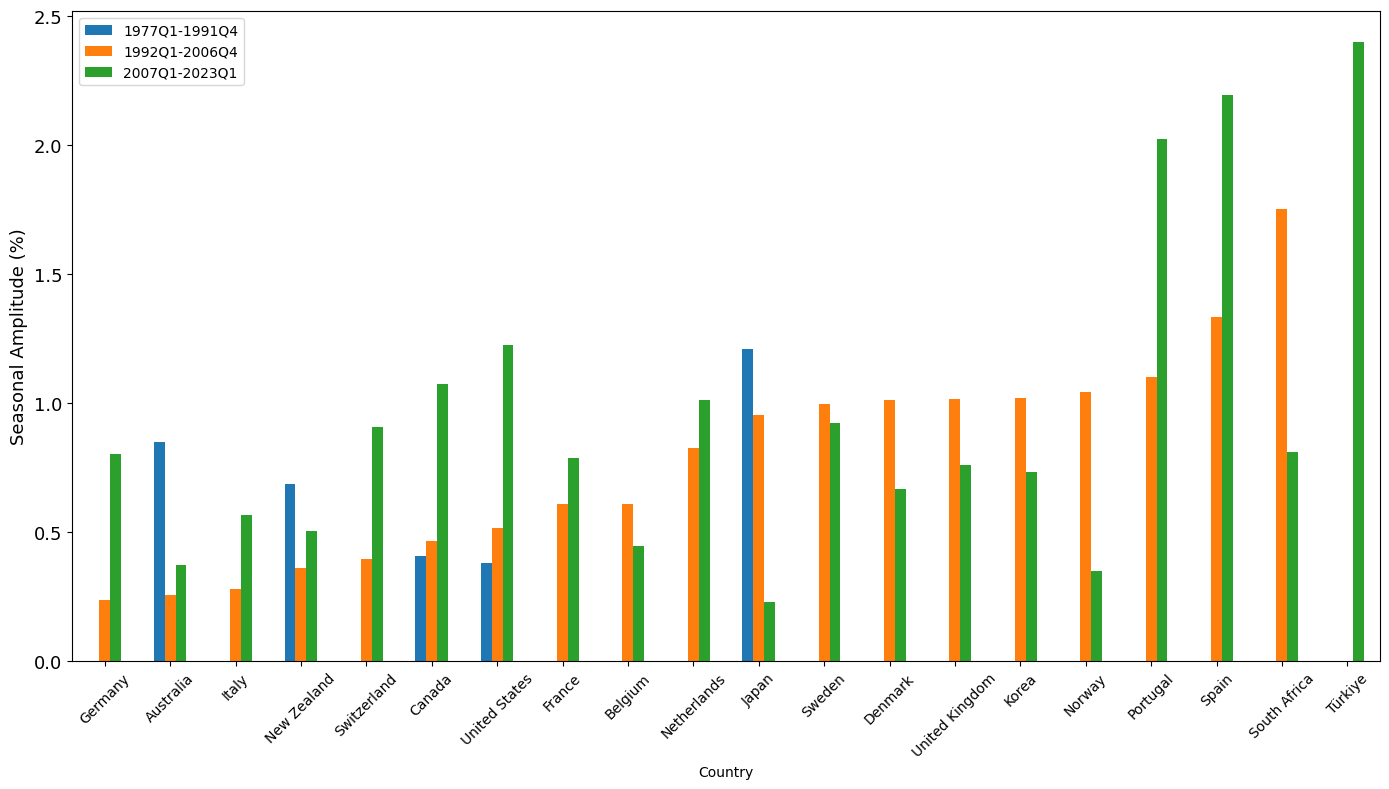

In [21]:
# Plotting a bar chart for the seasonal strength for each country over three different time periods.
ax = seasonality_results_df.plot(
    x='Country',
    kind='bar',
    figsize=(14, 8)
)

# Increase all font sizes on the axis


# Setting the y-axis label
ax.set_ylabel('Seasonal Amplitude (%)', fontsize=13)
plt.yticks(fontsize=13)

# Displaying the plot
plt.xticks(rotation=45)  # Rotate country names for better readability
plt.tight_layout()  # Adjust the layout
plt.show()

In [22]:
# only specific countries
seasonality_results_df_subset = seasonality_results_df[seasonality_results_df['Country'].isin(
    ['Canada', 'United States', 'Germany', 'Portugal', 'Spain', 'Netherlands']
)]

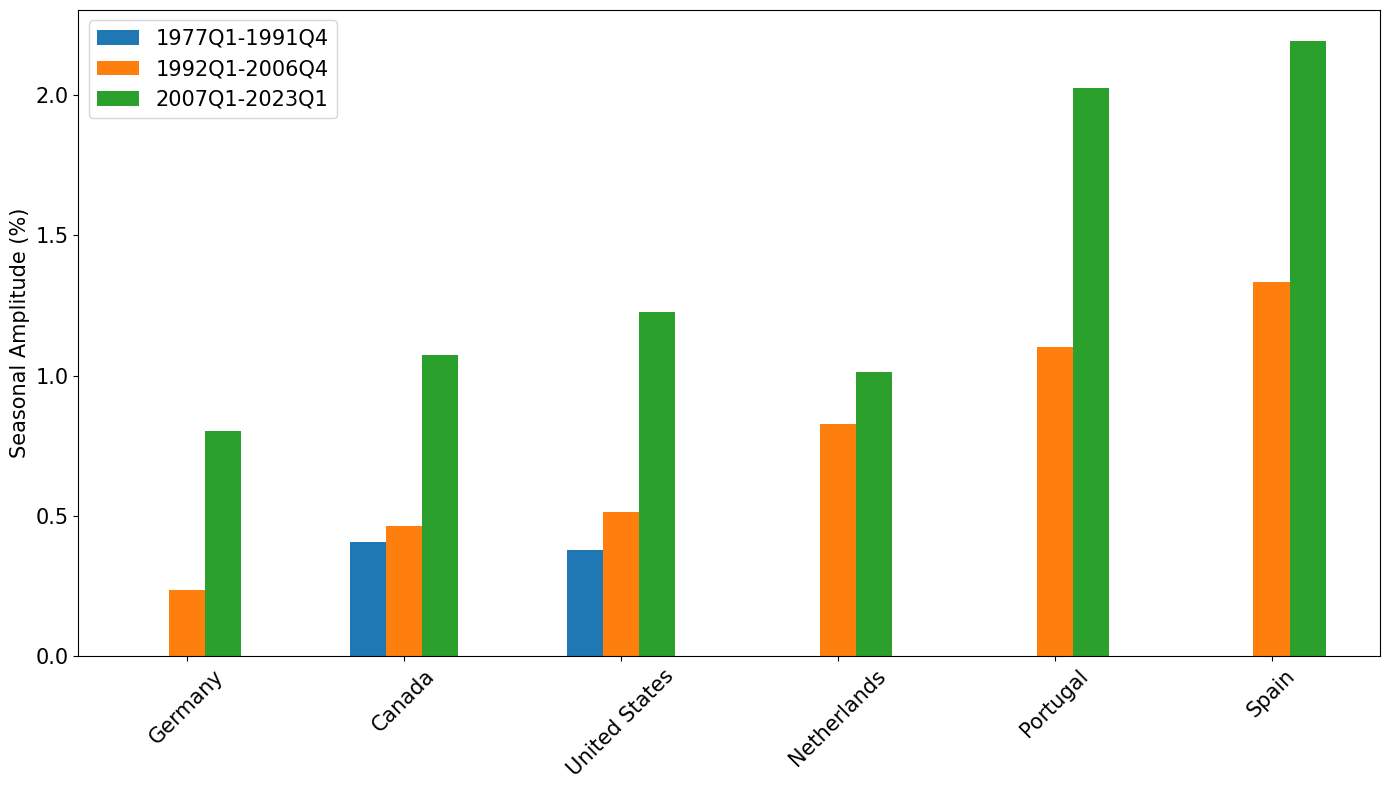

In [54]:
# Plotting a bar chart for the seasonal strength for each country over three different time periods.
ax = seasonality_results_df_subset.plot(
    x='Country',
    kind='bar',
    figsize=(14, 8),
    fontsize=15
)

# Increase all font sizes on the axis
# Setting the y-axis label
ax.set_ylabel('Seasonal Amplitude (%)', fontsize=15)
plt.yticks(fontsize=15)

# make legend larger
plt.legend(fontsize=15)

# Displaying the plot
plt.xticks(rotation=45)  # Rotate country names for better readability
# remove the x axis label
plt.xlabel('')
plt.tight_layout()  # Adjust the layout
plt.show()

# Inflation correlation

In [24]:
# Calculate inflation correlation between all countries
correlation_results_df = []
for country in countries:
    single_country_df = df[df["country"] == country]
    single_country_df.set_index(pd.to_datetime(single_country_df['date']), inplace=True)
    if single_country_df.index.freq is None:
        single_country_df.asfreq('QE')
    inflation_data = single_country_df["inflation"]
    for other_country in countries:
        if other_country == country:
            continue
        other_country_df = df[df["country"] == other_country]
        other_country_df.set_index(pd.to_datetime(other_country_df['date']), inplace=True)
        if other_country_df.index.freq is None:
            other_country_df.asfreq('QE')
        other_country_inflation_data = other_country_df["inflation"]
        correlation = inflation_data.corr(other_country_inflation_data)
        correlation_results_df.append({'country': country, 'other_country': other_country, 'correlation': correlation})
correlation_results_df = pd.DataFrame(correlation_results_df)

In [25]:
len(correlation_results_df)

380

In [26]:
from seminartools.utils import geo_distance
# Add a column to the correlation_results_df DataFrame to store the geographical distance between the countries
correlation_results_df['distance'] = correlation_results_df.apply(lambda row: geo_distance(row['country'], row['other_country'], use_geopy=False), axis=1)

/Users/philipphocker/opt/anaconda3/envs/seminar_env/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/Users/philipphocker/opt/anaconda3/envs/seminar_env/lib/python3.11/site-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [27]:
correlation_results_df['log_distance'] = np.log(correlation_results_df['distance'])

In [28]:
filtered_correlation_results_df = correlation_results_df[correlation_results_df['distance'] < 4000]

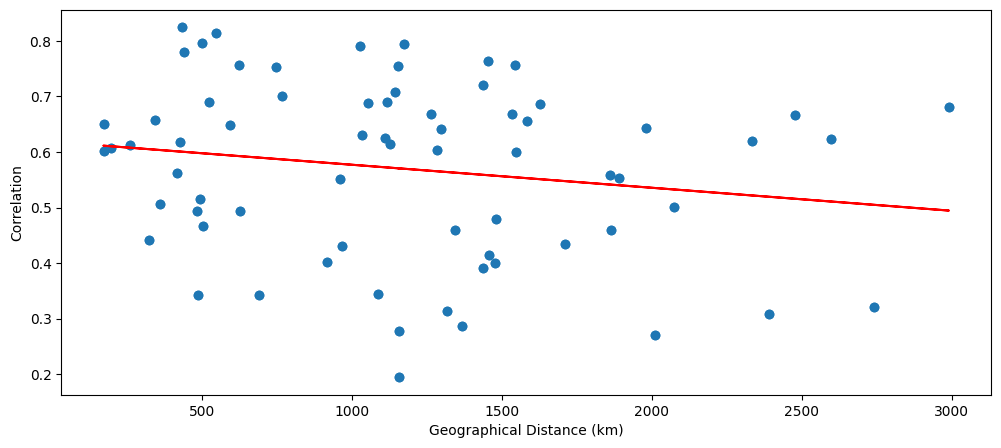

In [29]:
# plot correlation vs distance
plt.figure(figsize=(12, 5))
plt.scatter(filtered_correlation_results_df['distance'], filtered_correlation_results_df['correlation'])
plt.xlabel('Geographical Distance (km)')
plt.ylabel('Correlation')
# add an OLS regression line
x = filtered_correlation_results_df['distance']
y = filtered_correlation_results_df['correlation']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')
plt.show()

In [30]:
# Regress correlation on distance
import statsmodels.api as sm
model = sm.OLS(filtered_correlation_results_df['correlation'], sm.add_constant(filtered_correlation_results_df['distance']))

In [31]:
model_fit = model.fit()

In [32]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            correlation   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     4.347
Date:                Wed, 24 Apr 2024   Prob (F-statistic):             0.0390
Time:                        16:58:33   Log-Likelihood:                 62.109
No. Observations:                 138   AIC:                            -120.2
Df Residuals:                     136   BIC:                            -114.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6186      0.027     23.114      0.000       0.566       0.671
distance   -4.145e-05   1.99e-05     -2.085      0.039   -8.08e-05   -2.13e-06
==============================================================================
Omnibus:                       15.520   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.196
Skew:                          -0.414   Prob(JB):                       0.0166
Kurtosis:                       2.141   Cond. No.                     2.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Table for summary statistics

In [33]:
# find minimum date
min_date = df["date"].min()
max_date = df["date"].max()

In [34]:
countries = [
    "Japan", "Canada", "United States", "Australia", "New Zealand", "Switzerland", 
    "Italy", "France", "Portugal", "Spain", "Sweden", "Denmark", "United Kingdom", 
    "Germany", "Netherlands", "Norway", "Belgium", "Korea", "South Africa", "Türkiye"
]
df = read_merged().reset_index()

/Users/philipphocker/Documents/GitHub/seminar/seminartools/data.py:173: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").apply(lambda x: (1 + x).prod() - 1)  # quarterly return
/Users/philipphocker/Documents/GitHub/seminar/seminartools/data.py:409: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df = df.resample("Q").mean()  # Mean interest rate


In [35]:
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [36]:
# commodity dataframe
commodity_df = df[["date", "commodity_CRUDE_PETRO", "commodity_iNATGAS", "commodity_iAGRICULTURE", "commodity_iMETMIN", "commodity_iPRECIOUSMET"]]
commodity_df = commodity_df.set_index("date")
commodity_df.columns = ['Crude Oil', 'Natural Gas', 'Agriculture', 'Metal & Minerals', 'Precious Metals']
commodity_df = commodity_df[~commodity_df.index.duplicated(keep='first')]
commodity_df = commodity_df
summary_stats_commodity = commodity_df.describe()
summary_stats_commodity = summary_stats_commodity.drop("count")
summary_stats_commodity.loc["skewness"] = commodity_df.skew()
summary_stats_commodity.loc["kurtosis"] = commodity_df.kurtosis()
summary_stats_commodity = summary_stats_commodity.T
# rename the columns
summary_stats_commodity.columns = ['Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum', 'Skewness', 'Kurtosis']
# reorder the columns
summary_stats_commodity = summary_stats_commodity[['Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum']
]

In [37]:
summary_stats_commodity

,Mean,Standard Deviation,Skewness,Kurtosis,Minimum,25th Percentile,Median,75th Percentile,Maximum
Crude Oil,0.026142,0.183812,1.117630,8.189703,-0.585187,-0.056311,0.013132,0.118030,1.141921
Natural Gas,0.025831,0.186751,0.938762,3.583924,-0.585458,-0.062935,0.009503,0.085824,0.883228
Agriculture,0.005510,0.055805,0.205668,1.759553,-0.210650,-0.026968,0.000264,0.038794,0.206515
Metal & Minerals,0.012518,0.099288,-0.398436,2.780713,-0.483471,-0.044703,0.006541,0.067254,0.266129
Precious Metals,0.016960,0.090685,1.219255,3.956945,-0.190856,-0.042019,0.008684,0.059557,0.423082


In [38]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    summary_stats_commodity.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="Summary statistics for quarterly changes in global commodity indices.",
        label="tab:summary_stats_commodity",
        float_format="%.4f",
    )
)

\begin{table}
\caption{Summary statistics for quarterly changes in global commodity indices.}
\label{tab:summary_stats_commodity}
\begin{tabular}{lrrrrrrrrr}
\toprule
 & Mean & Standard Deviation & Skewness & Kurtosis & Minimum & 25th Percentile & Median & 75th Percentile & Maximum \\
\midrule
Crude Oil & 0.0261 & 0.1838 & 1.1176 & 8.1897 & -0.5852 & -0.0563 & 0.0131 & 0.1180 & 1.1419 \\
Natural Gas & 0.0258 & 0.1868 & 0.9388 & 3.5839 & -0.5855 & -0.0629 & 0.0095 & 0.0858 & 0.8832 \\
Agriculture & 0.0055 & 0.0558 & 0.2057 & 1.7596 & -0.2106 & -0.0270 & 0.0003 & 0.0388 & 0.2065 \\
Metal & Minerals & 0.0125 & 0.0993 & -0.3984 & 2.7807 & -0.4835 & -0.0447 & 0.0065 & 0.0673 & 0.2661 \\
Precious Metals & 0.0170 & 0.0907 & 1.2193 & 3.9569 & -0.1909 & -0.0420 & 0.0087 & 0.0596 & 0.4231 \\
\bottomrule
\end{tabular}
\end{table}



In [39]:
# do the same but for inflation
inflation_df = df[["date", "inflation", "country"]]
inflation_df = inflation_df.set_index("date")
# calculate summary statistics for each country
summary_stats_inflation = inflation_df.groupby("country").describe()
summary_stats_inflation = summary_stats_inflation["inflation"]
# make the count column int
summary_stats_inflation["count"] = summary_stats_inflation["count"].astype(int)
# calculate skewness and kurtosis
summary_stats_inflation["skewness"] = inflation_df.groupby("country")["inflation"].skew()
# calculate kurtosis
summary_stats_inflation['kurtosis'] = inflation_df.groupby('country')['inflation'].apply(pd.Series.kurtosis)

# rename the columns
summary_stats_inflation.columns = ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum', 'Skewness', 'Kurtosis']

#resort the columns
summary_stats_inflation = summary_stats_inflation[['Count', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum']]

In [40]:
summary_stats_inflation

,Count,Mean,Standard Deviation,Skewness,Kurtosis,Minimum,25th Percentile,Median,75th Percentile,Maximum
country,,,,,,,,,,
Australia,180,0.010245,0.008976,0.626289,0.767432,-0.019391,0.004077,0.007459,0.016709,0.040892
Belgium,98,0.005806,0.006784,1.650097,4.086730,-0.007684,0.001863,0.004406,0.008222,0.033275
Canada,185,0.008625,0.008531,0.800056,0.720732,-0.015317,0.002907,0.007174,0.012579,0.035912
Denmark,98,0.004976,0.006031,1.564099,4.491871,-0.003667,0.001006,0.003898,0.008582,0.032997
France,86,0.003987,0.005025,0.799794,1.174856,-0.005000,0.000000,0.003063,0.007458,0.022894
Germany,76,0.005095,0.006178,0.979690,2.184428,-0.006070,0.001803,0.003959,0.008110,0.028500
Italy,101,0.005138,0.006363,2.782650,14.049566,-0.004845,0.002006,0.004938,0.007160,0.043096
Japan,149,0.003649,0.007416,1.061743,1.642638,-0.012158,-0.001976,0.002323,0.007194,0.031900
Korea,95,0.006167,0.005708,0.366464,-0.123024,-0.005129,0.002107,0.005669,0.009978,0.020818


In [41]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    summary_stats_inflation.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="Summary statistics for quarterly inflation razes.",
        label="tab:summary_stats_inflation",
        float_format="%.4f",
    )
)

\begin{table}
\caption{Summary statistics for quarterly inflation razes.}
\label{tab:summary_stats_inflation}
\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Count & Mean & Standard Deviation & Skewness & Kurtosis & Minimum & 25th Percentile & Median & 75th Percentile & Maximum \\
country &  &  &  &  &  &  &  &  &  &  \\
\midrule
Australia & 180 & 0.0102 & 0.0090 & 0.6263 & 0.7674 & -0.0194 & 0.0041 & 0.0075 & 0.0167 & 0.0409 \\
Belgium & 98 & 0.0058 & 0.0068 & 1.6501 & 4.0867 & -0.0077 & 0.0019 & 0.0044 & 0.0082 & 0.0333 \\
Canada & 185 & 0.0086 & 0.0085 & 0.8001 & 0.7207 & -0.0153 & 0.0029 & 0.0072 & 0.0126 & 0.0359 \\
Denmark & 98 & 0.0050 & 0.0060 & 1.5641 & 4.4919 & -0.0037 & 0.0010 & 0.0039 & 0.0086 & 0.0330 \\
France & 86 & 0.0040 & 0.0050 & 0.7998 & 1.1749 & -0.0050 & 0.0000 & 0.0031 & 0.0075 & 0.0229 \\
Germany & 76 & 0.0051 & 0.0062 & 0.9797 & 2.1844 & -0.0061 & 0.0018 & 0.0040 & 0.0081 & 0.0285 \\
Italy & 101 & 0.0051 & 0.0064 & 2.7826 & 14.0496 & -0.0048 & 0.0020 & 0.0049 & 0.0072

In [42]:
gdp_growth_df = df[["date", "gdp_growth", "country"]]
gdp_growth_df = gdp_growth_df.set_index("date")
# divide all values by 100
gdp_growth_df["gdp_growth"] = gdp_growth_df["gdp_growth"] / 100
# calculate summary statistics for each country
summary_stats_gdp_growth = gdp_growth_df.groupby("country").describe()
summary_stats_gdp_growth = summary_stats_gdp_growth["gdp_growth"]
# make the count column int
summary_stats_gdp_growth["count"] = summary_stats_gdp_growth["count"].astype(int)
# calculate skewness and kurtosis
summary_stats_gdp_growth["skewness"] = gdp_growth_df.groupby("country")["gdp_growth"].skew()
# calculate kurtosis
summary_stats_gdp_growth['kurtosis'] = gdp_growth_df.groupby('country')['gdp_growth'].apply(pd.Series.kurtosis)
# rename the columns
summary_stats_gdp_growth.columns = ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum', 'Skewness', 'Kurtosis']
#resort the columns
summary_stats_gdp_growth = summary_stats_gdp_growth[['Count', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum']]


In [43]:
summary_stats_gdp_growth

,Count,Mean,Standard Deviation,Skewness,Kurtosis,Minimum,25th Percentile,Median,75th Percentile,Maximum
country,,,,,,,,,,
Australia,180,0.007637,0.010321,-1.996102,17.767445,-0.069488,0.004058,0.007480,0.011181,0.042453
Belgium,98,0.004503,0.017855,-0.476772,35.904338,-0.113884,0.002241,0.004547,0.007509,0.117510
Canada,185,0.005970,0.012944,-2.548512,43.990680,-0.109999,0.001978,0.006874,0.011254,0.090835
Denmark,98,0.003837,0.012349,-0.575571,10.594078,-0.060433,-0.000625,0.004747,0.009311,0.059074
France,86,0.003299,0.025115,1.877263,35.537575,-0.131528,0.000264,0.004338,0.006367,0.175368
Germany,76,0.003536,0.008990,-2.298150,12.614533,-0.046843,0.000070,0.004806,0.008115,0.022519
Italy,101,0.001423,0.020547,0.718878,29.841236,-0.116817,-0.002446,0.002244,0.005217,0.137249
Japan,149,0.005376,0.013545,-1.642125,10.959372,-0.077584,-0.000536,0.006131,0.012241,0.055163
Korea,95,0.009358,0.009835,-1.271234,5.247574,-0.032839,0.004987,0.008657,0.013952,0.029927


In [44]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    summary_stats_gdp_growth.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="Summary statistics for quarterly GDP growth rates.",
        label="tab:summary_stats_gdp_growth",
        float_format="%.4f",
    )
)

\begin{table}
\caption{Summary statistics for quarterly GDP growth rates.}
\label{tab:summary_stats_gdp_growth}
\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Count & Mean & Standard Deviation & Skewness & Kurtosis & Minimum & 25th Percentile & Median & 75th Percentile & Maximum \\
country &  &  &  &  &  &  &  &  &  &  \\
\midrule
Australia & 180 & 0.0076 & 0.0103 & -1.9961 & 17.7674 & -0.0695 & 0.0041 & 0.0075 & 0.0112 & 0.0425 \\
Belgium & 98 & 0.0045 & 0.0179 & -0.4768 & 35.9043 & -0.1139 & 0.0022 & 0.0045 & 0.0075 & 0.1175 \\
Canada & 185 & 0.0060 & 0.0129 & -2.5485 & 43.9907 & -0.1100 & 0.0020 & 0.0069 & 0.0113 & 0.0908 \\
Denmark & 98 & 0.0038 & 0.0123 & -0.5756 & 10.5941 & -0.0604 & -0.0006 & 0.0047 & 0.0093 & 0.0591 \\
France & 86 & 0.0033 & 0.0251 & 1.8773 & 35.5376 & -0.1315 & 0.0003 & 0.0043 & 0.0064 & 0.1754 \\
Germany & 76 & 0.0035 & 0.0090 & -2.2981 & 12.6145 & -0.0468 & 0.0001 & 0.0048 & 0.0081 & 0.0225 \\
Italy & 101 & 0.0014 & 0.0205 & 0.7189 & 29.8412 & -0.1168 & -0.0024 & 

In [45]:
interest_rate_df = df[["date", "interest_rate", "country"]]
interest_rate_df = interest_rate_df.set_index("date")
# divide all values by 100
interest_rate_df["interest_rate"] = interest_rate_df["interest_rate"] / 100
# calculate summary statistics for each country
summary_stats_interest_rate = interest_rate_df.groupby("country").describe()
summary_stats_interest_rate = summary_stats_interest_rate["interest_rate"]
# make the count column int
summary_stats_interest_rate["count"] = summary_stats_interest_rate["count"].astype(int)
# calculate skewness and kurtosis
summary_stats_interest_rate["skewness"] = interest_rate_df.groupby("country")["interest_rate"].skew()
# calculate kurtosis
summary_stats_interest_rate['kurtosis'] = interest_rate_df.groupby('country')['interest_rate'].apply(pd.Series.kurtosis)
# rename the columns
summary_stats_interest_rate.columns = ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum', 'Skewness', 'Kurtosis']
# resort the columns
summary_stats_interest_rate = summary_stats_interest_rate[['Count', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum']]


In [46]:
summary_stats_interest_rate

,Count,Mean,Standard Deviation,Skewness,Kurtosis,Minimum,25th Percentile,Median,75th Percentile,Maximum
country,,,,,,,,,,
Australia,180,0.070956,0.051605,0.871544,-0.094872,0.00100,0.035000,0.053333,0.107408,0.222500
Belgium,98,0.015774,0.015276,0.535820,-1.051320,0.00000,0.000083,0.010000,0.028958,0.047500
Canada,185,0.054576,0.045327,0.818831,-0.071500,0.00250,0.012500,0.045000,0.087700,0.204133
Denmark,98,0.014026,0.019522,0.439779,-1.222457,-0.00750,-0.006000,0.008583,0.030833,0.054000
France,86,0.012878,0.013715,0.787209,-0.582076,0.00000,0.000000,0.010000,0.020000,0.047500
Germany,76,0.012906,0.014108,0.844281,-0.604505,0.00000,0.000000,0.010000,0.021458,0.045833
Italy,101,0.016752,0.016116,0.556997,-0.947490,0.00000,0.000333,0.010833,0.030000,0.055000
Japan,149,0.022218,0.024267,0.690334,-0.792166,-0.00100,0.000500,0.008333,0.045000,0.090000
Korea,95,0.028544,0.013904,0.078294,-1.200552,0.00500,0.015833,0.027500,0.040417,0.052500


In [47]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    summary_stats_interest_rate.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="Summary statistics for quarterly central bank interest rates.",
        label="tab:summary_stats_interest_rates",
        float_format="%.4f",
    )
)

\begin{table}
\caption{Summary statistics for quarterly central bank interest rates.}
\label{tab:summary_stats_interest_rates}
\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Count & Mean & Standard Deviation & Skewness & Kurtosis & Minimum & 25th Percentile & Median & 75th Percentile & Maximum \\
country &  &  &  &  &  &  &  &  &  &  \\
\midrule
Australia & 180 & 0.0710 & 0.0516 & 0.8715 & -0.0949 & 0.0010 & 0.0350 & 0.0533 & 0.1074 & 0.2225 \\
Belgium & 98 & 0.0158 & 0.0153 & 0.5358 & -1.0513 & 0.0000 & 0.0001 & 0.0100 & 0.0290 & 0.0475 \\
Canada & 185 & 0.0546 & 0.0453 & 0.8188 & -0.0715 & 0.0025 & 0.0125 & 0.0450 & 0.0877 & 0.2041 \\
Denmark & 98 & 0.0140 & 0.0195 & 0.4398 & -1.2225 & -0.0075 & -0.0060 & 0.0086 & 0.0308 & 0.0540 \\
France & 86 & 0.0129 & 0.0137 & 0.7872 & -0.5821 & 0.0000 & 0.0000 & 0.0100 & 0.0200 & 0.0475 \\
Germany & 76 & 0.0129 & 0.0141 & 0.8443 & -0.6045 & 0.0000 & 0.0000 & 0.0100 & 0.0215 & 0.0458 \\
Italy & 101 & 0.0168 & 0.0161 & 0.5570 & -0.9475 & 0.0000 & 0.0003

In [48]:
unemployment_df = df[["date", "unemployment_rate", "country"]]
unemployment_df = unemployment_df.set_index("date")
# divide all values by 100
unemployment_df["unemployment_rate"] = unemployment_df["unemployment_rate"] / 100
# calculate summary statistics for each country
summary_stats_unemployment = unemployment_df.groupby("country").describe()
summary_stats_unemployment = summary_stats_unemployment["unemployment_rate"]
# make the count column int
summary_stats_unemployment["count"] = summary_stats_unemployment["count"].astype(int)
# calculate skewness and kurtosis
summary_stats_unemployment["skewness"] = unemployment_df.groupby("country")["unemployment_rate"].skew()
# calculate kurtosis
summary_stats_unemployment['kurtosis'] = unemployment_df.groupby('country')['unemployment_rate'].apply(pd.Series.kurtosis)
# make the count column int
summary_stats_unemployment["count"] = summary_stats_unemployment["count"].astype(int)
# rename the columns
summary_stats_unemployment.columns = ['Count', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum', 'Skewness', 'Kurtosis']
# resort the columns
summary_stats_unemployment = summary_stats_unemployment[['Count', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum']]


In [49]:
summary_stats_unemployment

,Count,Mean,Standard Deviation,Skewness,Kurtosis,Minimum,25th Percentile,Median,75th Percentile,Maximum
country,,,,,,,,,,
Australia,180,0.066817,0.018047,0.715614,-0.137780,0.033,0.05400,0.0620,0.07925,0.117
Belgium,98,0.074010,0.011193,-0.493707,-0.829541,0.049,0.06525,0.0765,0.08300,0.093
Canada,185,0.081568,0.018129,0.757913,0.134725,0.046,0.06900,0.0770,0.09200,0.139
Denmark,98,0.055735,0.012835,0.435482,-0.620018,0.033,0.04700,0.0535,0.06400,0.085
France,86,0.089488,0.010995,0.344023,0.123182,0.068,0.08125,0.0890,0.09600,0.121
Germany,76,0.061250,0.025471,0.563081,-0.876532,0.030,0.03800,0.0530,0.07950,0.115
Italy,101,0.095426,0.019402,0.014825,-0.925584,0.056,0.08000,0.0940,0.11100,0.136
Japan,149,0.030362,0.009177,0.892205,-0.337760,0.019,0.02400,0.0270,0.03800,0.054
Korea,95,0.034158,0.006244,1.313894,2.754176,0.024,0.03000,0.0330,0.03700,0.060


In [50]:
# generate latex code for the stats table
print(
    # replace _ by \_ in columns and index
    summary_stats_unemployment.pipe(lambda df: df.rename(columns=lambda x: x.replace("_", "\\_")))
    .pipe(lambda df: df.rename(index=lambda x: x.replace("_", "\\_")))
    .to_latex(
        index=True,
        caption="Summary statistics for quarterly unemployment rates.",
        label="tab:summary_stats_unemployment",
        float_format="%.4f",
    )
)

\begin{table}
\caption{Summary statistics for quarterly unemployment rates.}
\label{tab:summary_stats_unemployment}
\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Count & Mean & Standard Deviation & Skewness & Kurtosis & Minimum & 25th Percentile & Median & 75th Percentile & Maximum \\
country &  &  &  &  &  &  &  &  &  &  \\
\midrule
Australia & 180 & 0.0668 & 0.0180 & 0.7156 & -0.1378 & 0.0330 & 0.0540 & 0.0620 & 0.0793 & 0.1170 \\
Belgium & 98 & 0.0740 & 0.0112 & -0.4937 & -0.8295 & 0.0490 & 0.0653 & 0.0765 & 0.0830 & 0.0930 \\
Canada & 185 & 0.0816 & 0.0181 & 0.7579 & 0.1347 & 0.0460 & 0.0690 & 0.0770 & 0.0920 & 0.1390 \\
Denmark & 98 & 0.0557 & 0.0128 & 0.4355 & -0.6200 & 0.0330 & 0.0470 & 0.0535 & 0.0640 & 0.0850 \\
France & 86 & 0.0895 & 0.0110 & 0.3440 & 0.1232 & 0.0680 & 0.0813 & 0.0890 & 0.0960 & 0.1210 \\
Germany & 76 & 0.0613 & 0.0255 & 0.5631 & -0.8765 & 0.0300 & 0.0380 & 0.0530 & 0.0795 & 0.1150 \\
Italy & 101 & 0.0954 & 0.0194 & 0.0148 & -0.9256 & 0.0560 & 0.0800 & 0.0940 & 0.